In [1]:
import sys
import gensim.models.keyedvectors as word2vec
from gensim.test.utils import common_corpus, common_dictionary
import os
from gensim.sklearn_api import TfIdfTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree  
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords

C:\Users\Johannes\Anaconda3\envs\jojje1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johannes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#sentence function
def get_sentence_vec(sentence,model,stop_words):
    sWords=sentence.split(' ')
    vocab = model.vocab
    
    for word in sWords.copy(): #remove sentence words not found in the vocab
        if (word not in vocab) or (word in stop_words):
            sWords.remove(word)
            
    sVec=np.zeros(300)
    for Word in sWords:
        #print(Word)
        sVec=np.add(sVec,model[Word])
    returnVec=np.divide(sVec,len(sWords))   
    return returnVec

def combine_sentence_vec(sentences,model,stop_words):
    sentence_vec_list=[]
    for sent in sentences:
        sentence_vec_list=sentence_vec_list+[get_sentence_vec(sent,model,stop_words)]
    sentence_vec_x=np.stack(sentence_vec_list,axis=0)
    return sentence_vec_x

In [4]:
os.chdir("C:\\Users\\Johannes\\Desktop\\h4s\\studentstfest-master") #skriv in map för test_data
#Make all the data set
stop_words = stopwords.words('english')
#text_stuff = pd.read_csv("mendeley_scrape_ALL.csv",sep=",")
text_stuff = pd.read_csv("test_data",sep=",")

In [5]:
text_stuff_2=text_stuff["Abstract"]

In [6]:
text_stuff_2

0     past years global average temperature increase...
1     Using climate change experiments generated Fou...
2     continued increase atmospheric concentration c...
3     article reviews recent literature drought last...
4     Increasing greenhouse gas concentrations expec...
5     countries adopted global warming limit C relat...
6     impact projected global warming crop yields ev...
7     Earth warms many species likely disappear ofte...
8     Historical records precipitation streamflow dr...
9     past years many workers noted combined effect ...
10    paper demonstrates US prestigepress coverage g...
11    authors propose new climatic drought index sta...
12    Climate models satellite observations indicate...
13    Several recently published studies produced ap...
14    ONE effect global warming accelerate decomposi...
15    Water vapor dominant greenhouse gas important ...
16    Despite continued increase atmospheric greenho...
Name: Abstract, dtype: object

In [7]:
#text_stuff_2=text_stuff_2[1:len(text_stuff_2)]

In [8]:
#Load the word2vec database
embed_map = word2vec.KeyedVectors.load_word2vec_format("C:\\Users\\Johannes\\Desktop\\h4s\\GoogleNews-vectors-negative300.bin.gz", binary=True)

In [9]:
cluster_x=combine_sentence_vec(text_stuff_2,embed_map,stop_words)

In [10]:
linked = linkage(cluster_x, 'ward')

labelList = range(cluster_x.shape[0])

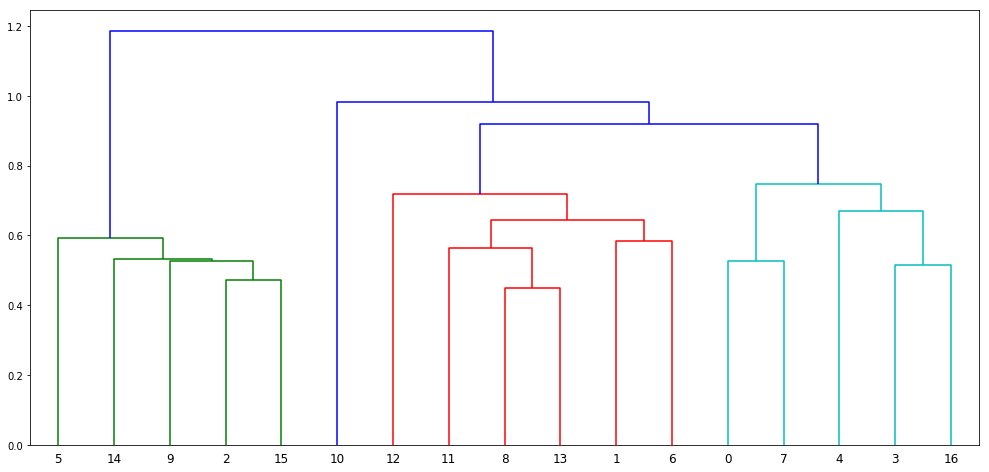

In [11]:
plt.figure(figsize=(cluster_x.shape[0], 8))  
dendrogram(linked, 
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [12]:
arr=cut_tree(linked,height=0.8) #Set cut (should be automatic)
list_thing=[[0,0]]*len(arr)
set_thing=set()
for i in range(len(arr)):
    list_thing[i]=[i,arr[i][0]]
    set_thing=set_thing.union(set(str(arr[i][0])))
    
list_0= [ [] for i in range(len(list(set_thing))) ]
for vec in list_thing:
    list_0[vec[1]].append(vec[0])
#list_0 is a list containing lists of clusters
clus_0= [ np.zeros(300) for i in range(len(list(set_thing))) ]
for i in range(cluster_x.shape[0]):
    clus_0[list_thing[i][1]]=clus_0[list_thing[i][1]]+cluster_x[i]
print("There is",len(clus_0),"clusters")

There is 4 clusters


In [13]:
embed_map.most_similar(positive=[clus_0[0]])

[('Warmer_seas', 0.7572243809700012),
 ('Atlantic_Multidecadal_Oscillation_AMO', 0.7198802828788757),
 ('poleward_shift', 0.7177090644836426),
 ('atmospheric_CO2_levels', 0.7107298374176025),
 ('climatic_variability', 0.7052105069160461),
 ('oceanic_circulation', 0.6990755200386047),
 ('called_Abydosaurus_mcintoshi', 0.6968605518341064),
 ('Warmer_harvests', 0.6918387413024902),
 ('Warmer_oceans', 0.689514696598053),
 ('Jellyfish_swarm_northward', 0.686876654624939)]

In [14]:
embed_map.most_similar(positive=[clus_0[1]])

[('Atlantic_Multidecadal_Oscillation_AMO', 0.7156540751457214),
 ('atmospheric_CO2_levels', 0.7041442394256592),
 ('FAR_WEST_TEXAS', 0.7001354098320007),
 ('mso_font_pitch', 0.6903090476989746),
 ('Warmer_seas', 0.6877490282058716),
 ('Antarctic_stratosphere', 0.6865097880363464),
 ('Vertical_wind_shear', 0.6841302514076233),
 ('climatic_variability', 0.6798188090324402),
 ('interannual', 0.6776994466781616),
 ('poleward_shift', 0.6776773929595947)]

In [15]:
embed_map.most_similar(positive=[clus_0[2]])

[('CarbonSMART_™_enterprise', 0.7502768039703369),
 ('atmospheric_CO2_levels', 0.7362477779388428),
 ('sulphate_aerosols', 0.7319340109825134),
 ('anthropogenic_carbon_dioxide', 0.7153979539871216),
 ('carbon_dioxide_CO_²', 0.7085928916931152),
 ('terrestrial_biosphere', 0.6979320049285889),
 ('GHG_concentrations', 0.6891335248947144),
 ('Antarctic_stratosphere', 0.6820710897445679),
 ('Carbon_dioxide_CO2', 0.6814360618591309),
 ('Greenhouse_gases_trap', 0.6802898645401001)]

In [16]:
embed_map.most_similar(positive=[clus_0[3]])

[('By_Laurelle_Gilbert', 0.6576451063156128),
 ('Bob_Ewegen_deputy', 0.6547286510467529),
 ('By_Kat_Zeman', 0.6474968791007996),
 ('By_Jonas_Elmerraji', 0.6473667621612549),
 ('By_Bill_Esbrook', 0.6459450721740723),
 ('JIM_HAND_covers', 0.6425351500511169),
 ('Linda_Seebach', 0.6416075825691223),
 ('By_Lisa_Shidler', 0.6405673027038574),
 ('visit_TimesWatch', 0.637122392654419),
 ('MUSSO_JT_c', 0.6349285840988159)]